In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
def MSA(df: pd.DataFrame, col: str):
    table = pd.DataFrame(columns=['Operator', 'Image', 'Attempt_1', 'Attempt_2', 'Attempt_3'])
    
    df.rename(columns={'operation_name': 'Operator', 'image_name': 'Image'}, inplace=True)

    for operator in df['Operator'].unique():
        for image in df['Image'].unique():
            metric = df.loc[(df['Operator'] == operator) & (df['Image'] == image), col].to_list()
            row = [operator, image, *metric]
            table = pd.concat([table, pd.DataFrame([row], columns=table.columns)])
            

    attempts_col = [c for c in table.columns if 'Attempt' in c]
    need_cols = ['Operator', 'Image']
    
    t = len(df['Operator'].unique())    # operators/ techn
    p = len(df['Image'].unique())       #  images/pars=ts
    r = 3                               # attempts/replications
    X_avg_all = df[col].mean()
    t, p, r, X_avg_all

    t = len(df['Operator'].unique())    # operators/ techn
    p = len(df['Image'].unique())       #  images/pars=ts
    r = 3                               # attempts/replications
    X_avg_all = df[col].mean()
    t, p, r, X_avg_all
    print(f't = {t}, p = {p}, r = {r}, X_avg_all = {X_avg_all}')

    SS_tech =  p*r*np.sum([ (x_mean - X_avg_all)**2 for x_mean in df.groupby(by='Operator').mean()[col].values]) # p*r *
    SS_part =  t*r*np.sum([ (x_mean - X_avg_all)**2 for x_mean in df.groupby(by='Image').mean()[col].values]) # t*r *
    SS_tech, SS_part
    print(f'SS_tech = {SS_tech}')
    print(f'SS_part = {SS_part}')

    SS_total = np.sum((table[attempts_col].to_numpy() - X_avg_all) ** 2)
    SS_total
    print(f'SS_total = {SS_total}')



    X_avg_ij = np.array([[0] * r] * t, dtype=np.float64)
    for i in range(t):
        for j in range(r):
            operator = table['Operator'].unique()[i]
            attempt = attempts_col[j]
            value = table[table['Operator'] == operator][attempt].mean()
            X_avg_ij[i, j] = value

            
    SS_eq = 0
    for i in range(t):
        for j in range(r):
            for m in range(p):
                operator = table['Operator'].unique()[i]
                img_name = table['Image'].unique()[m]
                attempt = attempts_col[j]
                attempt_to_img = table[(table['Operator'] == operator)][attempt].values
                SS_eq += (attempt_to_img[m] - X_avg_ij[i, j]) ** 2

    X_avg_ij, SS_eq
    print(f'SS_eq = {round(SS_eq, 3)}')

    SS_techxpart = SS_total - (SS_tech + SS_part + SS_eq)
    print(f'SS_techxpart = {SS_techxpart}')


    MS_tech = SS_tech / (t-1)
    MS_part = SS_part / (p-1)
    MS_tecxpart = SS_techxpart / (t-1) / (p-1)
    MS_eq = SS_eq / t / p / (r-1)
    MS_tech, MS_part, MS_tecxpart, MS_eq


    trials_number = r # t*p #
    sgm_rpt2 = max(0, MS_eq)
    sgm_txp2 = max(0, (MS_tecxpart - sgm_rpt2) / (trials_number))
    sgm_part2 = max(0, (MS_part - MS_tecxpart) / (trials_number * t))
    sgm_tec2 = max(0, (MS_tech - MS_tecxpart) / (trials_number * p))

    TOTAL_VAR = sgm_rpt2 + sgm_part2 + sgm_tec2 + sgm_txp2
    GageRR = sgm_rpt2 + sgm_tec2

    print(f'\n\n********************')
    print(f'GageRR = {(GageRR / TOTAL_VAR * 100)}')
    sgm_p2 = sgm_part2 + sgm_txp2

    P2P = sgm_part2 / TOTAL_VAR * 100

    
    D = np.sqrt((TOTAL_VAR+sgm_p2) / (TOTAL_VAR-sgm_p2))
    print(f'D = {D}')

    print(f'Equipment Variation (Reliability) = {sgm_rpt2 / TOTAL_VAR * 100}')
    print(f'Technician Variation (Reproducibility) = {sgm_p2 / TOTAL_VAR * 100}')
    print(f'P2P = {P2P}')

    GageRR_result = GageRR / TOTAL_VAR * 100
    Equipment_Variation = sgm_rpt2 / TOTAL_VAR * 100
    Technician_Variation = sgm_p2 / TOTAL_VAR * 100

    return GageRR_result, Equipment_Variation, Technician_Variation, D, P2P

In [145]:
# patg_to_df: Path = Path('images/v2_100/result.csv')
path_to_df = 'experiments.csv'
df = pd.read_csv(path_to_df)
df.head()

,Operator,Image,eps,IoU,F1_3,IoU_3,Annotation_accuracy
0,A,ex0_300,8.935637,0.891886,0.694229,0.277412,0.966711
1,A,ex0_300,8.719946,0.889560,0.688942,0.293515,0.963656
2,A,ex0_300,8.298180,0.893399,0.691964,0.301920,0.963178
3,A,ex3_300,23.413532,0.755258,0.695432,0.146538,0.922922
4,A,ex3_300,27.093038,0.723618,0.691879,0.099781,0.926411


In [151]:
MSA_2(df, 'F1_3')

t = 3, p = 4, r = 3, X_avg_all = 0.683113186813554
0.021188364613643422 0.00542596967709252 0.010258327093712844 0.0021375498791366106
0.003419442364570948 0.00018346892809460196

GageRR = 44.818432536729055 %
Equipment Variation (Reliability) = 20.85616019728157 %
Technician Variation (Reproducibility) = 38.271051220169134 %
P2P = 40.8727885825493 %
D = 1.5435469972547926


(44.818432536729055,
 20.85616019728157,
 38.271051220169134,
 40.8727885825493,
 1.5435469972547926)

In [23]:
# patg_to_df: Path = Path('experiments.csv')
# # patg_to_df: Path = Path('images/v2_100/result.csv')
# df = pd.read_csv(patg_to_df)
# df.head()

In [29]:
df = pd.read_csv('experiments.csv')
df.head()

,Operator,Image,eps,IoU,F1_3,IoU_3,Annotation_accuracy
0,A,ex0_300,8.935637,0.891886,0.694229,0.277412,0.966711
1,A,ex0_300,8.719946,0.889560,0.688942,0.293515,0.963656
2,A,ex0_300,8.298180,0.893399,0.691964,0.301920,0.963178
3,A,ex3_300,23.413532,0.755258,0.695432,0.146538,0.922922
4,A,ex3_300,27.093038,0.723618,0.691879,0.099781,0.926411


In [30]:
# df2 = df.copy()
# df2[['IoU', 'F1_3', 'IoU_3', 'Annotation_accuracy']] *= 100
# df2

In [31]:
# for col_name in ['IoU', 'F1_3', 'IoU_3']:
#     fig = plt.figure(figsize=(12, 10))
#     plt.title(col_name, fontsize=15)
#     plt.xlabel('Annotation_accuracy')
#     plt.scatter(df2['Annotation_accuracy'], df2[col_name])
#     plt.legend()
#     plt.show()

In [33]:
col = 'F1_3'

In [34]:
table = pd.DataFrame(columns=['Operator', 'Image', 'Attempt_1', 'Attempt_2', 'Attempt_3'])
for operator in df['Operator'].unique():
    for image in df['Image'].unique():
        metric = df.loc[(df['Operator'] == operator) & (df['Image'] == image), col].to_list()
        row = [operator, image, *metric]
        table = pd.concat([table, pd.DataFrame([row], columns=table.columns)])
        

attempts_col = [c for c in table.columns if 'Attempt' in c]
need_cols = ['Operator', 'Image']
        
table

,Operator,Image,Attempt_1,Attempt_2,Attempt_3
0,A,ex0_300,0.694229,0.688942,0.691964
0,A,ex3_300,0.695432,0.691879,0.696595
0,A,ex1_300,0.655601,0.671590,0.675346
0,A,ex2_300,0.677935,0.677726,0.675852
0,B,ex0_300,0.700861,0.704514,0.699167
0,B,ex3_300,0.737616,0.735084,0.734313
0,B,ex1_300,0.676887,0.674515,0.664910
0,B,ex2_300,0.685929,0.686301,0.679789
0,C,ex0_300,0.694665,0.690407,0.683241
0,C,ex3_300,0.658021,0.679597,0.687794


In [173]:
# (0.891886 + 0.889560 + 0.893399 + 0.755258+ 0.723618 + 0.721233 + 0.893315+0.910015+0.909615 +0.838959+0.815044+0.795462) / 12

In [174]:
# df.groupby(by='Image').mean()#[col].values

In [35]:
t = len(df['Operator'].unique())    # operators/ techn
p = len(df['Image'].unique())       #  images/pars=ts
r = 3                               # attempts/replications
X_avg_all = df[col].mean()
t, p, r, X_avg_all

(3, 4, 3, 0.683113186813554)

In [36]:
SS_tech =  p * r * np.sum([ (x_mean - X_avg_all)**2 for x_mean in df.groupby(by='Operator').mean()[col].values]) # p*r *
SS_part =  t * r * np.sum([ (x_mean - X_avg_all)**2 for x_mean in df.groupby(by='Image').mean()[col].values]) # t*r *
SS_tech, SS_part
print(f'SS_tech = {SS_tech}')
print(f'SS_part = {SS_part}')

SS_tech = 0.0054259696770925184
SS_part = 0.010258327093712775


In [37]:
SS_total = np.sum((table[attempts_col].to_numpy() - X_avg_all) ** 2)
SS_total
print(f'SS_total = {SS_total}')

SS_total = 0.021188364613643422


In [12]:
# # table[][attempts_col].mean(axis=1)
# X_avg_ij = np.array([
#     table[table['Operator'] == operator][attempts_col].mean(axis=1) for operator in table['Operator'].unique()
# ])
# X_avg_ij

In [38]:
X_avg_ij = np.array([[0] * r] * t, dtype=np.float64)
for i in range(t):
    for j in range(r):
        operator = table['Operator'].unique()[i]
        attempt = attempts_col[j]
        value = table[table['Operator'] == operator][attempt].mean()
        X_avg_ij[i, j] = value

        
SS_eq = 0
for i in range(t):
    for j in range(r):
        for m in range(p):
            operator = table['Operator'].unique()[i]
            img_name = table['Image'].unique()[m]
            attempt = attempts_col[j]
            attempt_to_img = table[(table['Operator'] == operator)][attempt].values
            SS_eq += (attempt_to_img[m] - X_avg_ij[i, j]) ** 2

X_avg_ij, SS_eq
print(f'SS_eq = {round(SS_eq, 3)}')

SS_eq = 0.015


In [39]:
SS_techxpart = SS_total - (SS_tech + SS_part + SS_eq)
print(f'SS_techxpart = {SS_techxpart}')

SS_techxpart = -0.00958185790857561


In [40]:
MS_tech = SS_tech / (t-1)
MS_part = SS_part / (p-1)
MS_tecxpart = SS_techxpart / (t-1) / (p-1)
MS_eq = SS_eq / t / p / (r-1)
MS_tech, MS_part, MS_tecxpart, MS_eq

(0.0027129848385462592,
 0.003419442364570925,
 -0.001596976318095935,
 0.0006285802396422391)

In [41]:
trials_number = r # t*p #
sgm_rpt2 = max(0, MS_eq)
sgm_txp2 = max(0, (MS_tecxpart - sgm_rpt2) / (trials_number))
sgm_part2 = max(0, (MS_part - MS_tecxpart) / (trials_number * t))
sgm_tec2 = max(0, (MS_tech - MS_tecxpart) / (trials_number * p))

In [42]:
sgm_tec2, sgm_rpt2

(0.00035916342972018285, 0.0006285802396422391)

In [43]:
TOTAL_VAR = sgm_rpt2 + sgm_part2 + sgm_tec2 + sgm_txp2

In [44]:
GageRR = sgm_rpt2 + sgm_tec2


print(f'GageRR = {(GageRR / TOTAL_VAR * 100)}')

GageRR = 63.926518149804224


In [45]:
sgm_p2 = sgm_part2 + sgm_txp2
sgm_p2

0.0005573798536296511

In [46]:
D = np.sqrt((TOTAL_VAR+sgm_p2) / (TOTAL_VAR-sgm_p2))
print(f'D = {D}')

D = 1.4589695354106211


In [47]:
print(f'Equipment Variation (Reliability) = {sgm_rpt2 / TOTAL_VAR * 100}')
print(f'Technician Variation (Reproducibility) = {sgm_p2 / TOTAL_VAR * 100}')

Equipment Variation (Reliability) = 40.68155265832839
Technician Variation (Reproducibility) = 36.07348185019578


In [48]:
print(f'GageRR = {(GageRR / TOTAL_VAR * 100)}')
print(f'Equipment Variation (Reliability) = {sgm_rpt2 / TOTAL_VAR * 100}')
print(f'Technician Variation (Reproducibility) = {sgm_p2 / TOTAL_VAR * 100}')
print(f'D = {D}')


GageRR = 63.926518149804224
Equipment Variation (Reliability) = 40.68155265832839
Technician Variation (Reproducibility) = 36.07348185019578
D = 1.4589695354106211


In [49]:
sgm_part2 / TOTAL_VAR * 100

36.07348185019578

In [191]:
sgm_

NameError: name 'sgm_' is not defined

# Validation!

In [152]:
path_to_table = Path(r'C:\Users\maxxx\Downloads\Google downloads')
df_table = pd.read_excel(path_to_table / 'table.xlsx')
df_table.head()

,Operator,Parts,attempt_1,attempt_2,attempt_3
0,A,1,2.78,1.87,1.87
1,A,2,2.36,2.36,2.21
2,A,3,2.22,2.45,2.33
3,A,4,4.56,4.21,4.13
4,A,5,3.56,3.47,3.69


In [153]:
df_body = []

for idx, row in df_table.iterrows():
    for i in range(1, 4):
        df_body.append([
            row['Operator'],
            row['Parts'],
            row[f'attempt_{i}'],
        ])

df = pd.DataFrame(df_body, columns=['operation_name', 'image_name', 'Metric'])
df.head()

,operation_name,image_name,Metric
0,A,1,2.78
1,A,1,1.87
2,A,1,1.87
3,A,2,2.36
4,A,2,2.36


In [9]:
df = pd.read_csv('experiments.csv')
df.head()

,Operator,Image,eps,IoU,F1_3,IoU_3,Annotation_accuracy
0,A,ex0_300,8.935637,0.891886,0.694229,0.277412,0.966711
1,A,ex0_300,8.719946,0.889560,0.688942,0.293515,0.963656
2,A,ex0_300,8.298180,0.893399,0.691964,0.301920,0.963178
3,A,ex3_300,23.413532,0.755258,0.695432,0.146538,0.922922
4,A,ex3_300,27.093038,0.723618,0.691879,0.099781,0.926411


In [155]:
MSA_2(df, 'Metric')
print(SS_TOTAL, SS_TECH, SS_PART, SS_EQ)
print(MS_pa rt, MS_eq)

t = 3, p = 10, r = 3, X_avg_all = 3.066
120.68195999999999 0.09992666666666782 116.52942666666664 3.6057999999999995
12.94771407407407 0.051956495726496

GageRR = 3.499181719207414 %
Equipment Variation (Reliability) = 3.499181719207414 %
Technician Variation (Reproducibility) = 0.0 %
P2P = 96.50081828079259 %
D = 7.493745388883887


(3.499181719207414,
 3.499181719207414,
 0.0,
 96.50081828079259,
 7.493745388883887)

In [50]:
def MSA_2(df: pd.DataFrame, col: str):
    table = pd.DataFrame(columns=['Operator', 'Image', 'Attempt_1', 'Attempt_2', 'Attempt_3'])
    df.rename(columns={'operation_name': 'Operator', 'image_name': 'Image'}, inplace=True)
    # print('here')
    for operator in df['Operator'].unique():
        for image in df['Image'].unique():
            metric = df.loc[(df['Operator'] == operator) & (df['Image'] == image), col].to_list()
            row = [operator, image, *metric]
            table = pd.concat([table, pd.DataFrame([row], columns=table.columns)])
            # print(f'here at {operator} {image}')
    attempts_col = [c for c in table.columns if 'Attempt' in c]
    need_cols = ['Operator', 'Image']

    t = len(df['Operator'].unique())    # operators/ techn
    p = len(df['Image'].unique())       #  images/pars=ts
    r = 3                               # attempts/replications
    X_avg_all = df[col].mean()
    t, p, r, X_avg_all
    print(f't = {t}, p = {p}, r = {r}, X_avg_all = {X_avg_all}')

    technican_average = {}
    for operator in df['Operator'].unique():
        # print(len(df[df['Operator'] == operator]))
        technican_average[operator] = df[df['Operator'] == operator][col].mean()
    technican_average

    SD_each_tech = {}
    for operator in df['Operator'].unique():
        SD_each_tech[operator] = (technican_average[operator] - X_avg_all) ** 2
    SD_each_tech

    All_SD_TECH = np.sum(list(SD_each_tech.values()))
    All_SD_TECH

    SUM_OF_DEVIATIONS_TECH = p * r * All_SD_TECH
    SS_TECH = SUM_OF_DEVIATIONS_TECH
    SUM_OF_DEVIATIONS_TECH

    part_average = {}
    for part in df['Image'].unique():
        #print(len(df[df['Image'] == part][col]))
        part_average[part] = df[df['Image'] == part][col].mean()
    part_average  


    SD_each_part = {}
    for part in df['Image'].unique():
        SD_each_part[part] = (part_average[part] - X_avg_all) ** 2
    SD_each_part


    All_SD_PART = np.sum(list(SD_each_part.values()))
    SUM_OF_DEVIATIONS_PART = r * t * All_SD_PART
    SS_PART = SUM_OF_DEVIATIONS_PART
    All_SD_PART, SUM_OF_DEVIATIONS_PART


    TOTAL_SUM_OF_SQUARES = np.sum((table[attempts_col] - X_avg_all).to_numpy() ** 2)
    SS_TOTAL = TOTAL_SUM_OF_SQUARES
    TOTAL_SUM_OF_SQUARES


    #4 Eq
    SSEQ = 0
    for part in df['Image'].unique():
        for operator in df['Operator'].unique():
            tech_part_avg = df[(df['Operator'] == operator) & (df['Image'] == part)][col].mean()
            assert len(df[(df['Operator'] == operator) & (df['Image'] == part)][col].values) == 3
            for el in df[(df['Operator'] == operator) & (df['Image'] == part)][col].values:
                SSEQ += (el - tech_part_avg) ** 2
    SS_EQ = SSEQ
    SSEQ

    SS_TECH_X_PART = SS_TOTAL - (SS_TECH + SS_PART + SS_EQ)
    print(SS_TOTAL, SS_TECH, SS_PART, SS_EQ)
    SS_TECH_X_PART


    MS_tech = SS_TECH / (t-1)
    MS_part = SS_PART / (p-1)
    MS_tecxpart = SS_TECH_X_PART / (t-1) / (p-1)
    MS_eq = SS_EQ / t / p / (r-1)
    MS_eq = (SS_TECH_X_PART + SS_EQ) / ((t-1) * (p-1) + t*p*(r-1))
    # print(SS_TECH_X_PART)
    # print(SS_EQ, t * p * (r-1))
    MS_tech, MS_part, MS_tecxpart, MS_eq

    sgm_rpt2 = max(0, MS_eq)
    sgm_txp2 = max(0, (MS_tecxpart - sgm_rpt2) / r)
    sgm_p2 = max(0, (MS_part - MS_eq) / r / t) # MS_eq <-> MS_tecxpart
    print(MS_part, MS_eq)

    sgm_tech2 = max(0, (MS_tech - MS_eq)/r/p)     # MS_eq <-> MS_tecxpart
    sgm_rpt2, sgm_txp2, sgm_p2, sgm_tech2


    GageRR = sgm_rpt2 + sgm_tech2
    EV = sgm_rpt2
    TV = sgm_tech2 + sgm_txp2
    PtP = sgm_p2
    Total_Var = sgm_rpt2 + sgm_p2 + sgm_tech2 + sgm_txp2

    GageRR, EV, TV, PtP, Total_Var


    def get_normalized(value, total_var):
        return value / total_var * 100
    print()
    print(f'GageRR = {get_normalized(GageRR, Total_Var)} %')
    print(f'Equipment Variation (Reliability) = {get_normalized(EV, Total_Var)} %')
    print(f'Technician Variation (Reproducibility) = {get_normalized(TV, Total_Var)} %')
    print(f'P2P = {get_normalized(PtP, Total_Var)} %')
    D = np.sqrt((Total_Var+sgm_p2) / (Total_Var-sgm_p2))
    print(f'D = {D}')
    GageRR = get_normalized(GageRR, Total_Var)
    EV = get_normalized(EV, Total_Var)
    TV = get_normalized(TV, Total_Var)
    PtP = get_normalized(PtP, Total_Var)
    return GageRR, EV, TV, PtP, D

## Проверка MSA на синтетических данных

In [67]:
class CustomExample:
    def __init__(self, value, sigma = 1):
        self.value = value
        self.sigma = sigma
    def get(self):
        return np.random.normal(self.value, self.sigma)

In [91]:
ex1 = CustomExample(100, 1)
data = [] #[[ex1.get(), ex1.get(), ex1.get()] for i in range(4)]
for operator_name in ['A', 'B', 'C', 'D']:
    for i in range(1, 3):
        for j in range(3):
            data.append([operator_name, f'img_{i}.png', ex1.get()])
df_test = pd.DataFrame(data, columns=['operation_name', 'image_name', 'value'])
df_test.head()

,operation_name,image_name,value
0,A,img_1.png,100.599348
1,A,img_1.png,98.779716
2,A,img_1.png,100.332308
3,A,img_2.png,101.053588
4,A,img_2.png,98.775627


In [88]:
# data = [] #[[ex1.get(), ex1.get(), ex1.get()] for i in range(4)]
# for operator_name in ['A', 'B', 'C', 'D']:
#     for i in range(1, 4):
#         data.append([operator_name, f'img_{i}.png', ex1.get()])
# df_test = pd.DataFrame(data, columns=['operation_name', 'image_name', 'value'])
# df_test.head()

In [92]:
MSA_2(df_test, 'value')

t = 4, p = 2, r = 3, X_avg_all = 99.76219060305307
28.402418550525898 4.637367427770695 0.5260290810475258 16.106890431922047
0.5260290810475258 1.2231064232477724

GageRR = 76.84480115752683 %
Equipment Variation (Reliability) = 73.60821982029793 %
Technician Variation (Reproducibility) = 26.391780179702078 %
P2P = 0.0 %
D = 1.0


(76.84480115752683, 73.60821982029793, 26.391780179702078, 0.0, 1.0)

In [4]:
from matplotlib.patches import Patch


def get_statistics(col: str):
    prcntg_arr = [0, 10, 30, 50, 70]
    metrics = []
    for p in prcntg_arr:
        path_to_df = Path(f'images/v2_{p}/result.csv')
        df = pd.read_csv(path_to_df)
        GageRR, EV, TV, PtP, D = MSA_2(df, col=col)
        metrics.append([GageRR, EV, TV, PtP, D])
        print(metrics[-1])
    metrics = np.array(metrics).T

    def value2color(value, m):
        if m != 'D':
            if value > 9:   return 'red'
            elif value <= 1:    return 'green'
            else:   return 'yellow'
        else:
            if value > 10:   return 'green'
            elif value <= 4:    return 'red'
            else:   return 'yellow'

    def get_title(m, col):
        m2title = {
            'GageRR': 'Gage R&R', 'EV': 'Equipment Variation (Reliability)',
            'TV': 'Technician Variation (Reproducibility)', 'PtP': 'Part to Part', 'D': 'D'
        }
        col_dict = {'EPorosity': 'eps', 'IoU_pores': 'IoU pores', 'F1_binary_7': 'F1_7', 'IoU_pores_7': 'IoU_7'}
        col = col_dict[col]
        value = m2title[m]
        return f'{value}, {col}'

    for i, m in enumerate(['GageRR', 'EV', 'TV', 'PtP', 'D']):
        for j in range(len(metrics[0])):
            plt.bar(prcntg_arr[j], metrics[i, j], width=5, alpha=0.7, edgecolor = 'black', color=value2color(metrics[i, j], m))
        plt.title(get_title(m, col))

        if m != 'D':
            legend_elements = [
            Patch(facecolor='green', edgecolor='black',
                    label='<1%'),
            Patch(facecolor='yellow', edgecolor='black',
                    label='>=1% & <=9%'),
            Patch(facecolor='red', edgecolor='black',
                    label='>9%')]
            plt.ylim([0, 100])
            plt.legend(handles=legend_elements)
            plt.ylabel('Metric / Total Variation, %')
        else:
            legend_elements = [
            Patch(facecolor='green', edgecolor='black',
                    label='>10'),
            Patch(facecolor='yellow', edgecolor='black',
                    label='>=4 & <=10'),
            Patch(facecolor='red', edgecolor='black',
                    label='<4')]
            plt.ylim([0, 10])
            plt.legend(handles=legend_elements)
            plt.ylabel('Metric')
            

        plt.grid(alpha=0.3)
        
        plt.xlabel('Excluded ratio, %')
        
    
        # Create the figure
        #fig, ax = plt.subplots()
        
        plt.savefig(f'images/output/{col}_{m}.png')
        plt.show()

t = 3, p = 4, r = 3, X_avg_all = 9.690723089194698
1854.0600654277403 345.49458982210217 1164.0506008687523 68.48188729407049
388.0168669562508 11.483829157896192

GageRR = 31.842990921603846 %
Equipment Variation (Reliability) = 14.672692632026859 %
Technician Variation (Reproducibility) = 31.872880727826917 %
P2P = 53.45442664014624 %
D = 1.815726860405131
[31.842990921603846, 14.672692632026859, 31.872880727826917, 53.45442664014624, 1.815726860405131]
t = 3, p = 4, r = 3, X_avg_all = 8.622313792933095
1757.7458509072574 650.7491420453393 670.1882751684739 59.898743282255744
223.39609172282462 14.560281123114805

GageRR = 50.73446487321319 %
Equipment Variation (Reliability) = 18.25707359664834 %
Technician Variation (Reproducibility) = 52.64755743732705 %
P2P = 29.095368966024605 %
D = 1.3493295482305114
[50.73446487321319, 18.25707359664834, 52.64755743732705, 29.095368966024605, 1.3493295482305114]
t = 3, p = 4, r = 3, X_avg_all = 8.460554854301002
1654.7606301870155 605.43208140

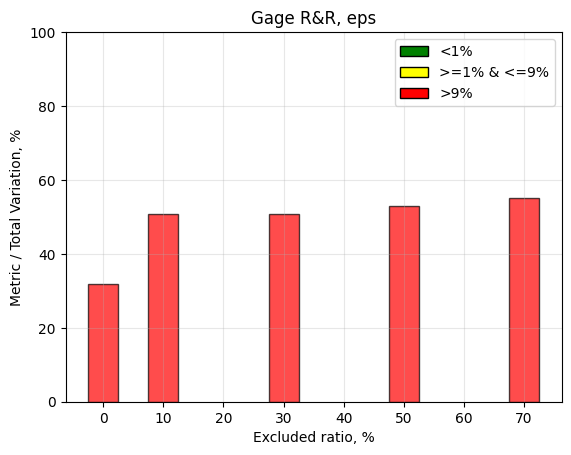

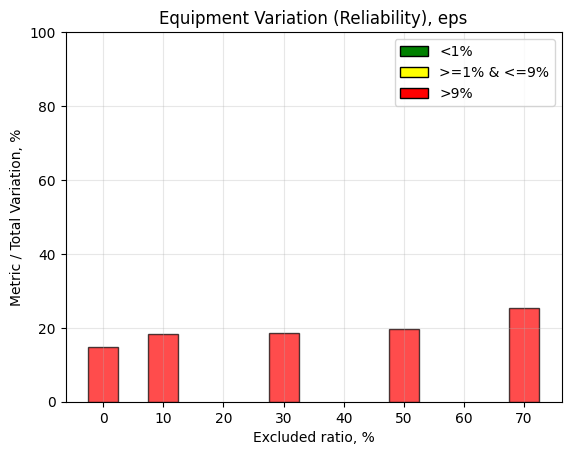

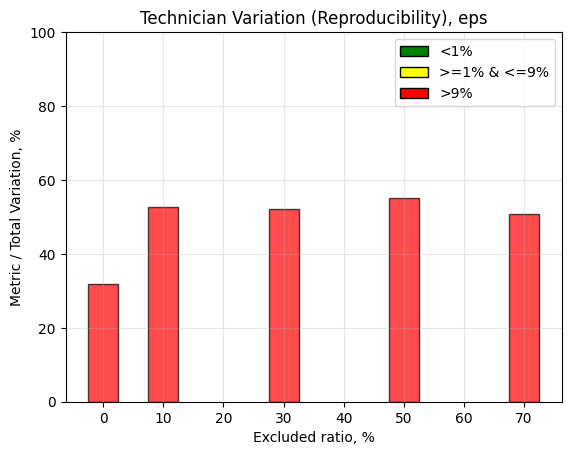

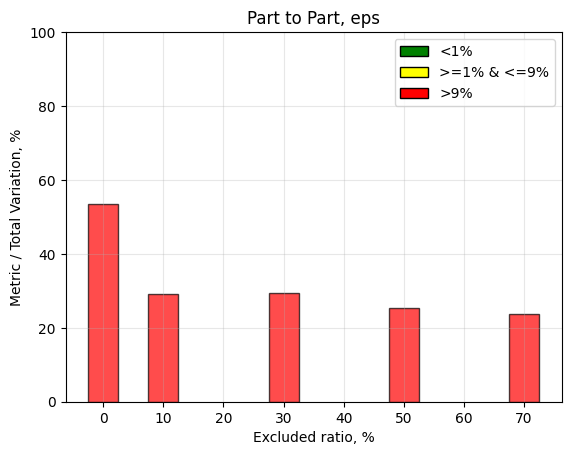

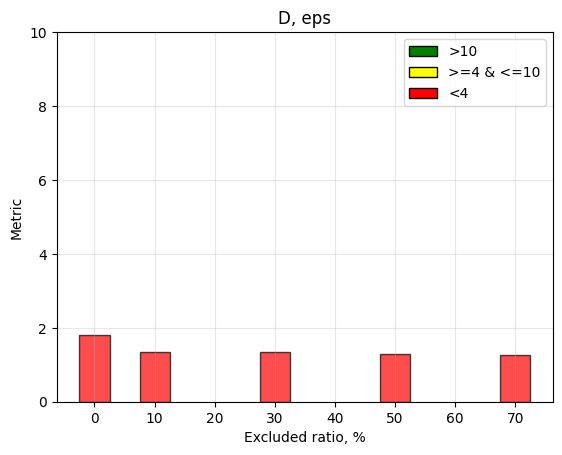

t = 3, p = 4, r = 3, X_avg_all = 0.8622785267559969
0.1373757150335693 0.013526846602542506 0.09574911479660161 0.004686874965818678
0.031916371598867205 0.0009366584544808389

GageRR = 24.29940913164072 %
Equipment Variation (Reliability) = 16.003299016604817 %
Technician Variation (Reproducibility) = 25.185080622083806 %
P2P = 58.81162036131138 %
D = 1.9636034430216072
[24.29940913164072, 16.003299016604817, 25.185080622083806, 58.81162036131138, 1.9636034430216072]
t = 3, p = 4, r = 3, X_avg_all = 0.8722547210642719
0.0955240007677093 0.023015819163685728 0.0492622117904459 0.0045453027832427365
0.016420737263481967 0.000774865660452589

GageRR = 39.85542204403128 %
Equipment Variation (Reliability) = 18.500483536626785 %
Technician Variation (Reproducibility) = 39.9932263653001 %
P2P = 41.50629009807311 %
D = 1.5553684638964274
[39.85542204403128, 18.500483536626785, 39.9932263653001, 41.50629009807311, 1.5553684638964274]
t = 3, p = 4, r = 3, X_avg_all = 0.8730259108667818
0.09720

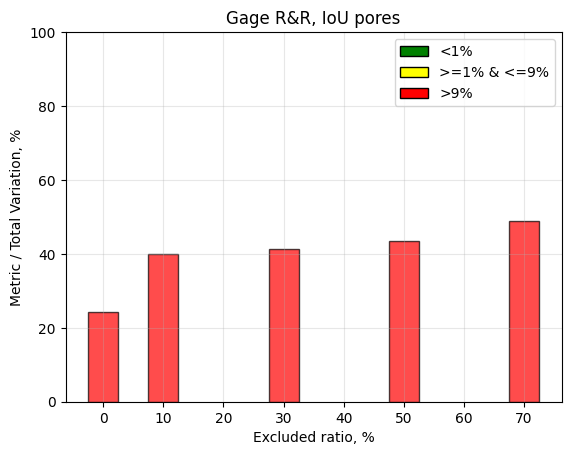

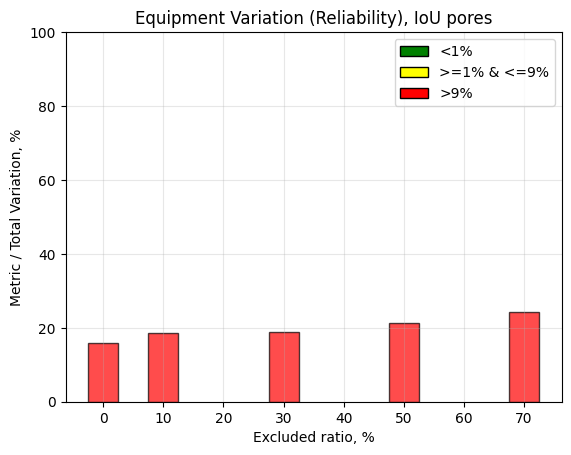

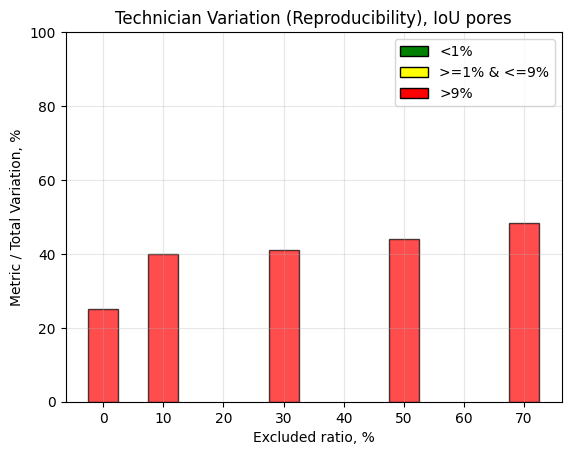

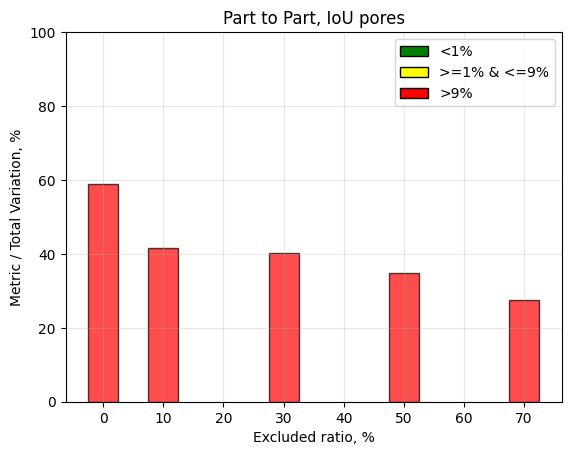

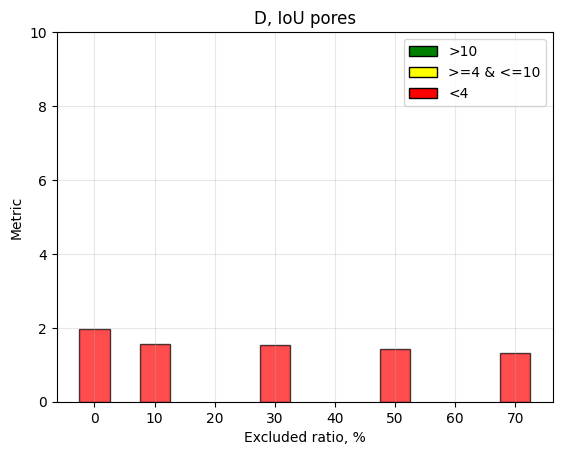

t = 3, p = 4, r = 3, X_avg_all = 0.8046409222527193
0.03192727481308068 0.007915429050942216 0.011495089956136339 0.0043775471792173995
0.003831696652045446 0.0004172251935334041

GageRR = 50.703932811079 %
Equipment Variation (Reliability) = 29.70092498525253 %
Technician Variation (Reproducibility) = 43.29182110503983 %
P2P = 27.007253909707636 %
D = 1.3190899504065912
[50.703932811079, 29.70092498525253, 43.29182110503983, 27.007253909707636, 1.3190899504065912]
t = 3, p = 4, r = 3, X_avg_all = 0.8083270056334092
0.03706968213632528 0.010129491809374423 0.01678695992656509 0.0037376515459897714
0.00559565330885503 0.0003384410133461922

GageRR = 46.94103325575621 %
Equipment Variation (Reliability) = 21.69435503630713 %
Technician Variation (Reproducibility) = 40.862116962438996 %
P2P = 37.44352800125387 %
D = 1.4822655780276275
[46.94103325575621, 21.69435503630713, 40.862116962438996, 37.44352800125387, 1.4822655780276275]
t = 3, p = 4, r = 3, X_avg_all = 0.8096982104689213
0.0388

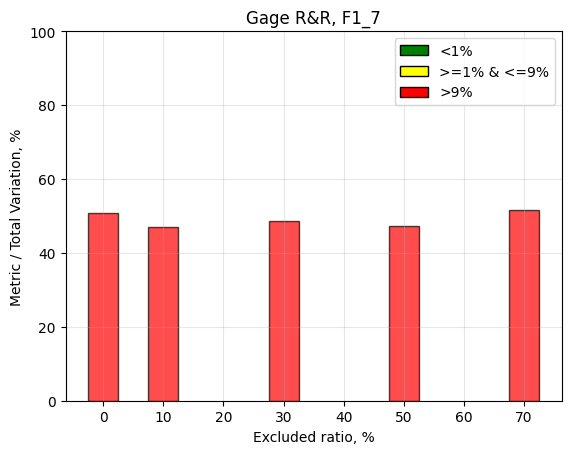

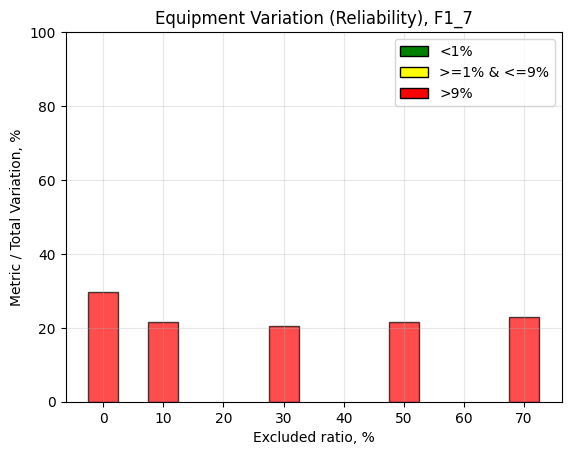

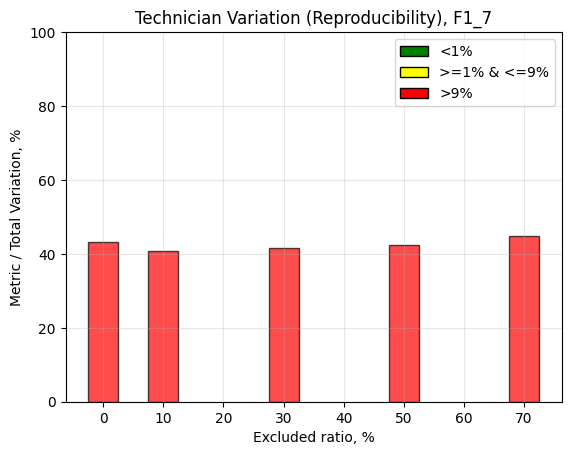

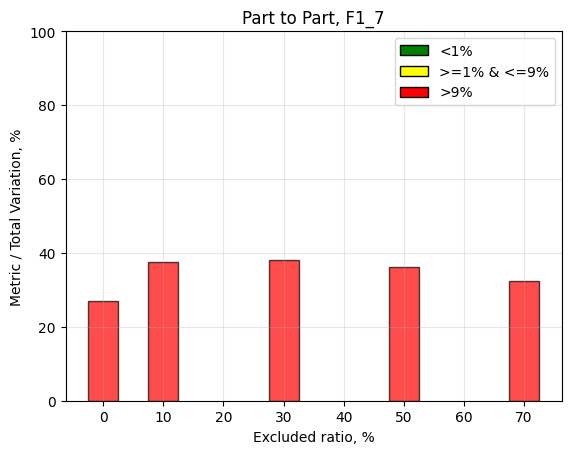

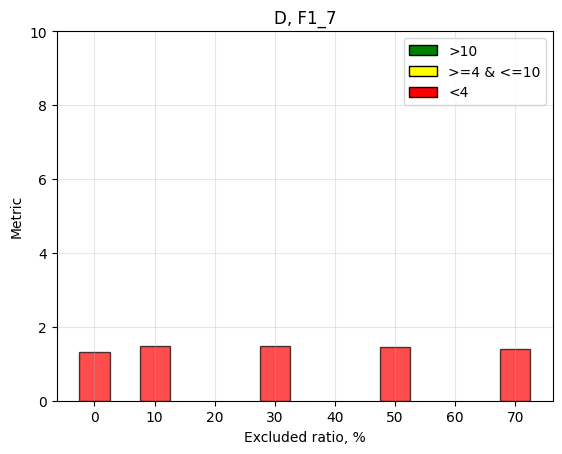

t = 3, p = 4, r = 3, X_avg_all = 0.5526359503858596
0.6153740331175286 0.178408265084699 0.3025557103168437 0.03956522250796156
0.1008519034389479 0.00448033525719953

GageRR = 44.345648254223626 %
Equipment Variation (Reliability) = 17.21595769306435 %
Technician Variation (Reproducibility) = 41.63809264551335 %
P2P = 41.14594966142229 %
D = 1.5486241652750807
[44.345648254223626, 17.21595769306435, 41.63809264551335, 41.14594966142229, 1.5486241652750807]
t = 3, p = 4, r = 3, X_avg_all = 0.5634719759451791
0.6662092732127965 0.23715958803274145 0.30208405080680906 0.03942955737749439
0.10069468360226969 0.0042321878124415326

GageRR = 49.26734189027389 %
Equipment Variation (Reliability) = 15.151972632999572 %
Technician Variation (Reproducibility) = 46.47551542618142 %
P2P = 38.37251194081901 %
D = 1.4984342090754057
[49.26734189027389, 15.151972632999572, 46.47551542618142, 38.37251194081901, 1.4984342090754057]
t = 3, p = 4, r = 3, X_avg_all = 0.5678633334580814
0.6758609984099018

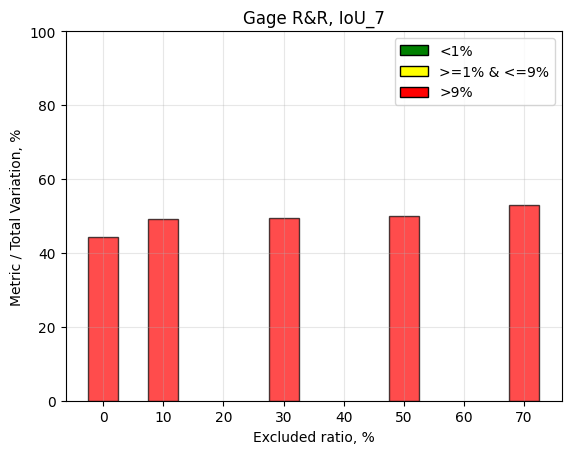

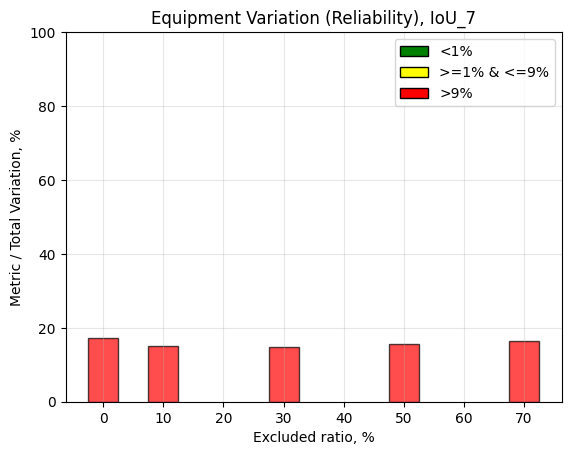

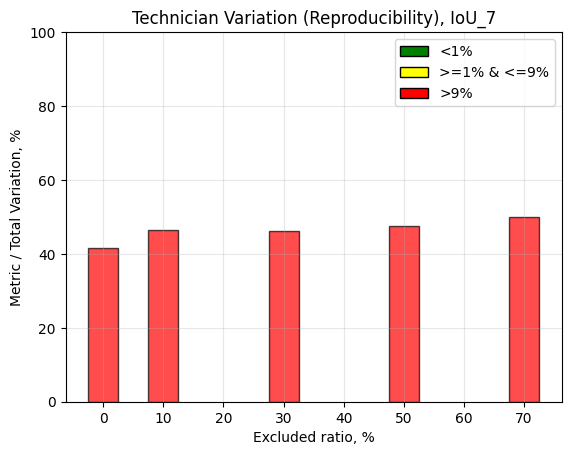

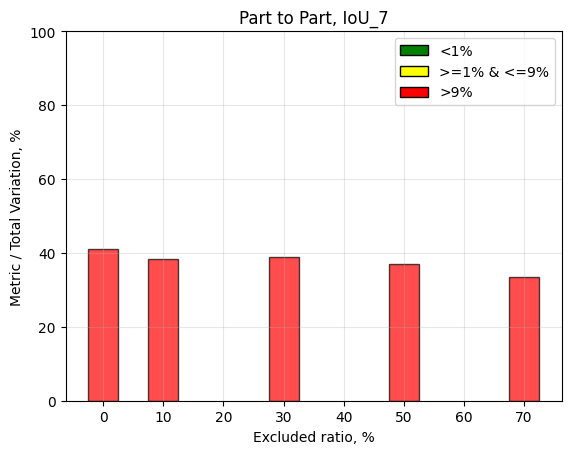

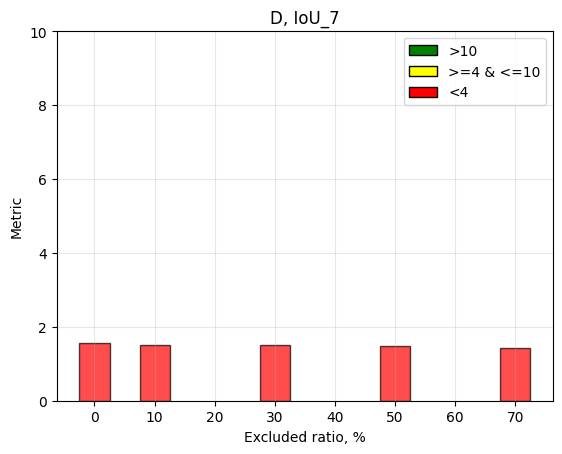

In [160]:
for col in ['EPorosity', 'IoU_pores', 'F1_binary_7', 'IoU_pores_7']:
    get_statistics(col)

In [22]:
MSA_2(df, col='IoU_pores_7')

t = 3, p = 4, r = 3, X_avg_all = 0.5526359503858596
0.6153740331175286 0.178408265084699 0.3025557103168437 0.03956522250796156
0.1008519034389479 0.00448033525719953

GageRR = 44.345648254223626 %
Equipment Variation (Reliability) = 17.21595769306435 %
Technician Variation (Reproducibility) = 41.63809264551335 %
P2P = 41.14594966142229 %
D = 1.5486241652750807


(44.345648254223626,
 17.21595769306435,
 41.63809264551335,
 41.14594966142229,
 1.5486241652750807)

In [124]:
prcntg = 0
path_to_df = Path(f'images/v2_{prcntg}/result.csv')
# path_to_df = Path(f'experiments.csv')
df = pd.read_csv(path_to_df)
df.head()

,operation_name,image_name,EPorosity,IoU_pores,F1_binary_7,IoU_pores_7
0,C,ex0_300,2.568872,0.925472,0.842085,0.702406
1,C,ex0_300,3.268688,0.919719,0.830584,0.674540
2,C,ex0_300,1.564611,0.923659,0.832457,0.695502
3,C,ex3_300,13.400614,0.753523,0.802452,0.570339
4,C,ex3_300,18.033269,0.741565,0.805334,0.537238


In [126]:
df['EPorosity'].mean()

9.690723089194698

In [142]:
from matplotlib.patches import Patch


def get_metrics_statistics(image_name):
    prcntg_arr = [0, 10, 30, 50, 70]
    images_arr = ['ex0_300', 'ex1_300', 'ex2_300', 'ex3_300']
    metrics_arr = []
    for p in prcntg_arr:
        path_to_df = Path(f'images/v2_{p}/result.csv')
        df = pd.read_csv(path_to_df)
        metrics_avg = []
        m = df[df['image_name'] == image_name]
        metrics_arr.append([m['EPorosity'].mean(), 100*m['IoU_pores'].mean(), 100*m['F1_binary_7'].mean(), 100*m['IoU_pores_7'].mean()])
        # metrics_arr.append(metrics_avg)
    metrics_arr = np.array(metrics_arr).T
    # print(metrics_arr)
    # print(metrics_arr.shape)
    def get_title(col, image_name):
        col_dict = {'EPorosity': 'eps', 'IoU_pores': 'IoU pores', 'F1_binary_7': 'F1_7', 'IoU_pores_7': 'IoU_7'}
        return f'{col_dict[col]}, {image_name}'

    for i, col in enumerate(['EPorosity', 'IoU_pores', 'F1_binary_7', 'IoU_pores_7']):
        plt.bar(prcntg_arr, metrics_arr[i], width=5, alpha=0.7, edgecolor = 'black')
        plt.title(get_title(col, image_name))
        # plt.ylim([0, 100])
        plt.ylabel('Metric, %')
        plt.grid(alpha=0.3)
        plt.xlabel('Excluded ratio, %')
        plt.savefig(f'images/output/{image_name}_{col}.png')
        plt.show()

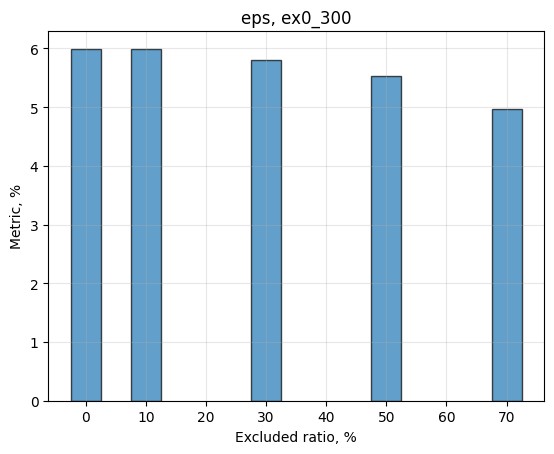

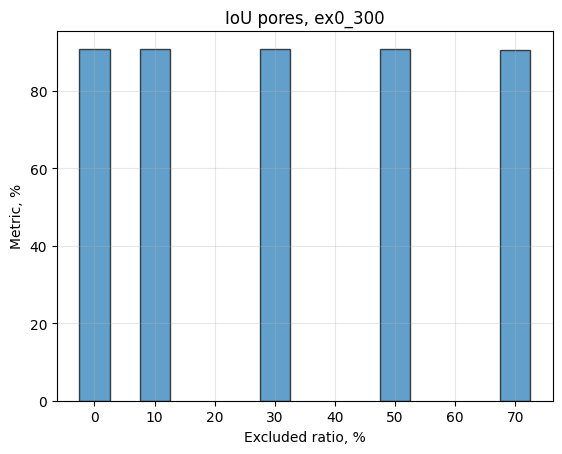

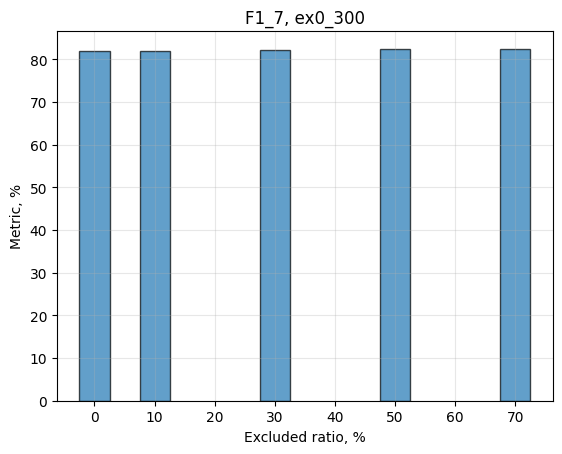

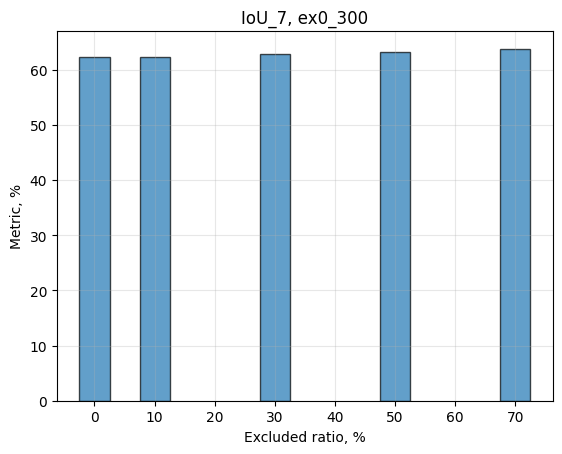

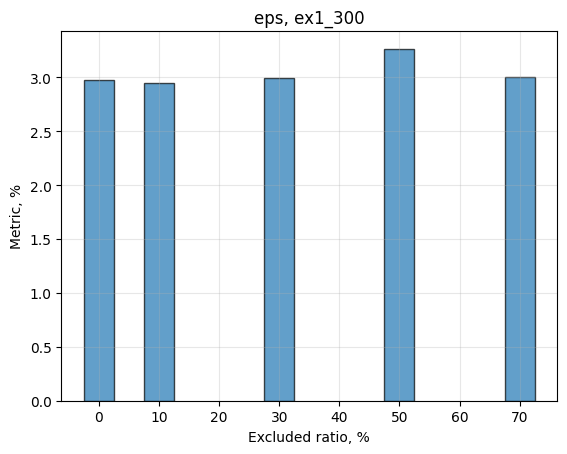

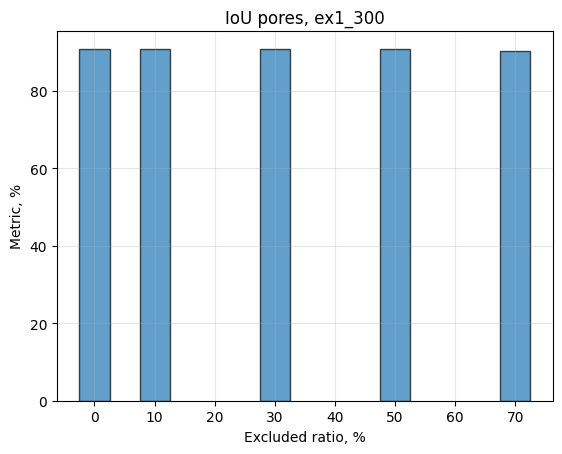

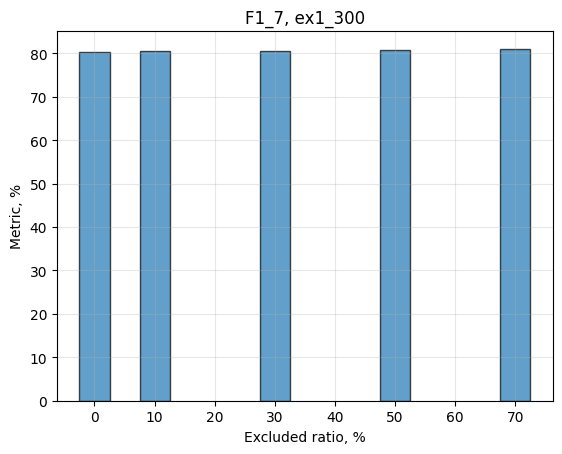

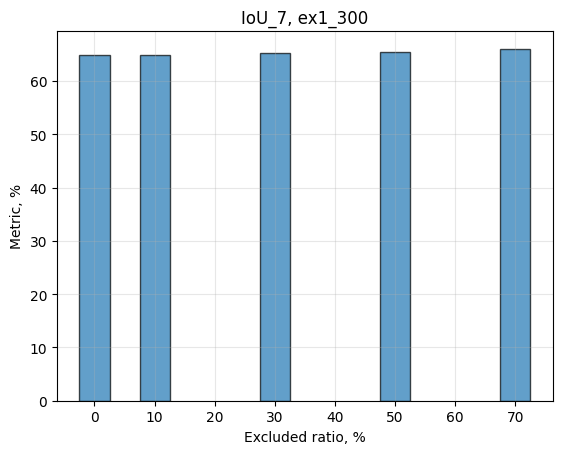

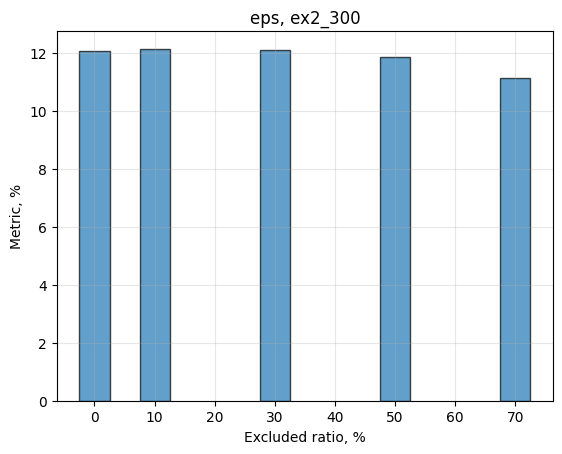

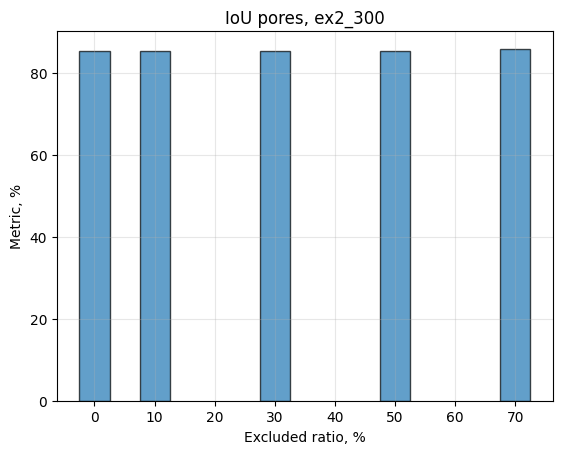

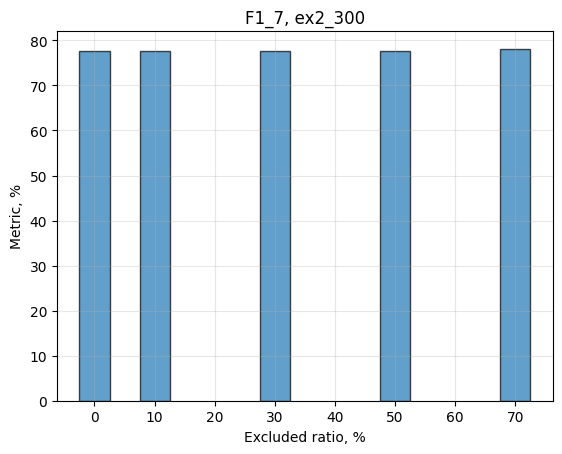

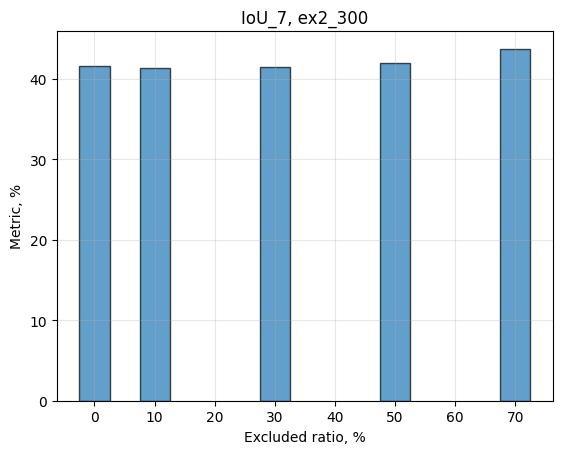

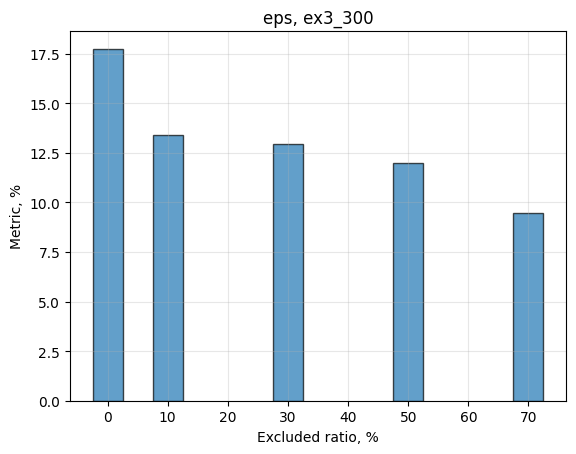

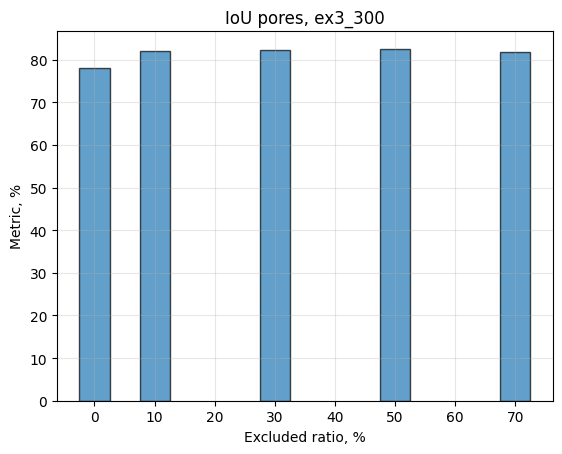

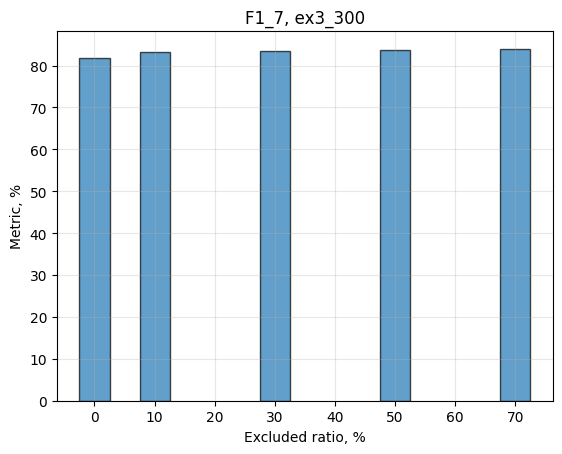

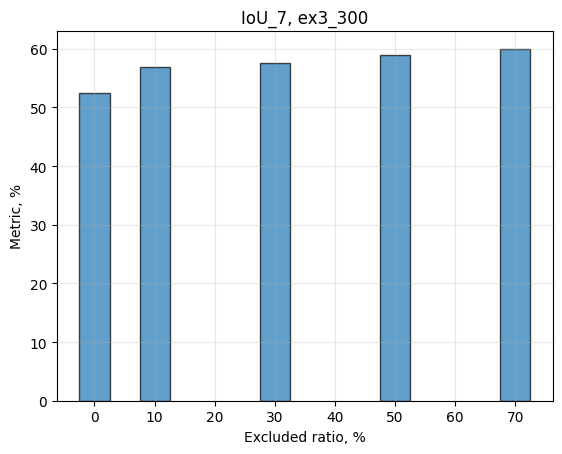

In [143]:
for img_name in ['ex0_300', 'ex1_300', 'ex2_300', 'ex3_300']:
    get_metrics_statistics(image_name=img_name)   # ['ex0_300', 'ex1_300', 'ex2_300', 'ex3_300']